In [1]:
# Importación de librerias necesarias

# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway

from scipy.stats import shapiro

# Configuración
pd.set_option('display.max_columns', None)

In [2]:
# Para utilizar funciones definidas en un .py
import soporte_ev3_ADSB as ADSB

In [3]:
# carga de los archivos que contienen los datos
df_activity = pd.read_csv("files/Customer Flight Activity.csv")
df_history = pd.read_csv("files/Customer Loyalty History.csv")

Fase 1: Exploración y Limpieza

In [4]:
df_activity.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [5]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [6]:
df_activity.shape

(405624, 10)

In [7]:
df_activity.duplicated().sum()

1864

In [8]:
df_activity = df_activity.drop_duplicates()
df_activity.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [9]:
df_activity.duplicated().sum()

0

In [10]:
# Obtener estadísticas básicas de las columnas numéricas
activity_basicas = df_activity.describe()
activity_basicas.T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [11]:
df_history.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


In [12]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [13]:
df_history.shape

(16737, 16)

In [14]:
df_history.duplicated().sum()

0

In [15]:
df_history.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [16]:
# Obtener estadísticas básicas de las columnas numéricas
history_basicas = df_history.describe()
history_basicas.T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [17]:
# Hay valores de salarios negativos, se corrigen buscando su valor absoluto
df_history['Salary'] = df_history['Salary'].abs()

In [18]:
# Se comprueba que ya no hay valores negativos
valor_minimo = df_history['Salary'].min()
valor_maximo = df_history['Salary'].max()
print("Valor mínimo de la columna 'Salary':", valor_minimo)
print("Valor máximo de la columna 'Salary':", valor_maximo)

Valor mínimo de la columna 'Salary': 9081.0
Valor máximo de la columna 'Salary': 407228.0


In [19]:
# Realizamos la unión utilizando el método merge()
df_loyalty = pd.merge(df_history, df_activity, on='Loyalty Number', how='inner')

# El parámetro 'how' indica el tipo de unión que quieres realizar, en este caso 'inner' para mantener 
# solo las filas que tienen una coincidencia en ambas tablas.

# Ahora df_loyalty contendrá todas las columnas de df_history y df_activity, 
# manteniendo todas las columnas de df_history y añadiendo las columnas de df_activity.

In [20]:
df_loyalty.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0


In [21]:
ADSB.exploracion_datos(df_loyalty)

La forma es (403760, 25)
---------------
Los nulos son:


Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

---------------
Hay 0 duplicados
---------------
Los datos son de tipo:


Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

---------------
Las columnas son Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')


In [22]:
# normalizo los nombres de las columnas eliminando espacios y usando solo minusculas

df_loyalty.columns = df_loyalty.columns.str.lower().str.replace(" ", "_")
df_loyalty.head(3)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0


In [23]:
# Se calcula el porcentaje de valores nulos en la columna 'salary'

salary_nulos = df_loyalty['salary'].isnull().sum()
salary_filas = len(df_loyalty['salary'])
porcentaje_salary_nulos = (salary_nulos / salary_filas) * 100

print(f"Porcentaje de valores nulos en la columna 'salary': {porcentaje_salary_nulos:.2f}%")

Porcentaje de valores nulos en la columna 'salary': 25.33%


In [24]:
# Se calcula el porcentaje de valores nulos en las columnas "cancellation_year" y "cancellation_month"

cancellation_nulos = df_loyalty['cancellation_year'].isnull().sum()
cancellation_filas = len(df_loyalty['cancellation_year'])
porcentaje_cancellation_nulos = (cancellation_nulos / cancellation_filas) * 100

print(f"Porcentaje de valores nulos en las columnas 'cancellation_year' y 'cancellation_month': {porcentaje_cancellation_nulos:.2f}%")

Porcentaje de valores nulos en las columnas 'cancellation_year' y 'cancellation_month': 87.70%


In [25]:
# Con un porcentaje de nulos tan alto como 87.70% la falta de datos en esa columna es demasiado alta para que sea útil. 
# Por lo que se decide eliminar las columnas 'Cancellation Year' y 'Cancellation Month'
df_loyalty = df_loyalty.drop(['cancellation_year','cancellation_month'], axis=1)

In [26]:
df_loyalty.shape

(403760, 23)

In [27]:
# Para gestionar el 25% de nulos de la columna "salary" se podrían imputarlos valores nulos en columnas numéricas con la media
# pudiera ser más preciso utilizar otro método de imputación, probare de las dos maneras.

In [28]:
# Para imputar los nulos de "salary" con la mediana se utilizaría este código

df_loyalty['salary'].fillna(df_loyalty['salary'].mean(), inplace=True)
df_loyalty.info()

loyalty_basicas = df_loyalty.describe()
loyalty_basicas.T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   country                      403760 non-null  object 
 2   province                     403760 non-null  object 
 3   city                         403760 non-null  object 
 4   postal_code                  403760 non-null  object 
 5   gender                       403760 non-null  object 
 6   education                    403760 non-null  object 
 7   salary                       403760 non-null  float64
 8   marital_status               403760 non-null  object 
 9   loyalty_card                 403760 non-null  object 
 10  clv                          403760 non-null  float64
 11  enrollment_type              403760 non-null  object 
 12  enrollment_year              403760 non-null  int64  
 13 

,count,mean,std,min,25%,50%,75%,max
loyalty_number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.000000,772152.00,999986.00
salary,403760.0,79371.732902,30008.343196,9081.00,63901.00,79371.732902,82940.00,407228.00
clv,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.340000,8937.12,83325.38
enrollment_year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.000000,2017.00,2018.00
enrollment_month,403760.0,6.667555,3.398829,1.00,4.00,7.000000,10.00,12.00
year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.000000,2018.00,2018.00
month,403760.0,6.501335,3.451982,1.00,4.00,7.000000,10.00,12.00
flights_booked,403760.0,4.134050,5.230064,0.00,0.00,1.000000,8.00,21.00
flights_with_companions,403760.0,1.036569,2.080472,0.00,0.00,0.000000,1.00,11.00
total_flights,403760.0,5.170619,6.526858,0.00,0.00,1.000000,10.00,32.00


In [29]:
# Se preservanlas tendencias de las estadisticas descripticas básica y se producen menos valores atípicos al imputar el 25% 
# de nulos de la columna "Salary" con el uso de la mediana de dicha columana que al utilizar el metodo KNN.

In [30]:
# valores_unicos = df_loyalty['education'].unique()
# valores_unicos

In [31]:
# Para poder utilizar el nivel educativo como un parametros de comparación para imputar salarios

# Definir el mapeo de valores únicos a números
# mapeo_educacion = {
#     'Bachelor': 1,
#     'College': 2,
#     'Master': 3,
#     'High School or Below': 4,
#     ' Doctor': 5
# }

# Crear la nueva columna 'education_level' utilizando el mapeo
# df_loyalty['education_level'] = df_loyalty['education'].map(mapeo_educacion)

# Mostrar el DataFrame resultante
# print(df_loyalty)

# unicos_level = df_loyalty['education_level'].unique()
# unicos_level

In [32]:
# df_loyalty.sample(5)

In [33]:
# from sklearn.impute import KNNImputer

In [34]:
# Se seleccionan los datos
# datos_conocidos = df_loyalty.dropna(subset=['salary'])

# Seleccionar tanto 'salary' como 'education_level' para datos desconocidos
# datos_desconocidos = df_loyalty[df_loyalty['salary'].isnull()][['salary', 'education_level']]

# Aplicar el modelo KNN
# imputer = KNNImputer(n_neighbors=5)  
# imputer.fit(datos_conocidos[['education_level']])  # Seleccionar las características relevantes

# Imputar los valores nulos
# valores_imputados = imputer.transform(datos_desconocidos[['education_level']])

# Actualizar el DataFrame original con los valores imputados
# df_loyalty.loc[df_loyalty['salary'].isnull(), 'salary'] = valores_imputados

In [35]:
# loyalty_basicas = df_loyalty.describe()
# loyalty_basicas.T

In [36]:
# df_loyalty.info()

Fase 2: Visualización

1.	¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

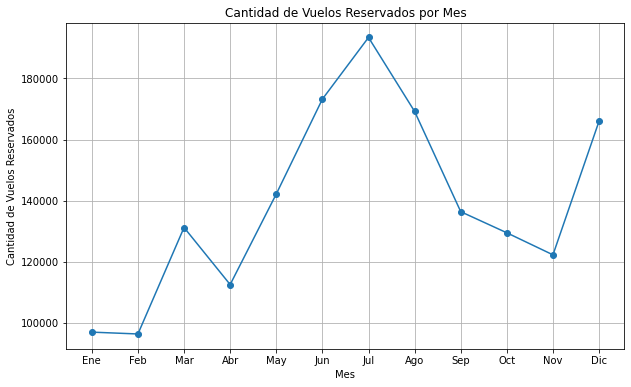

In [37]:
# Se agrupan los datos por mes y sumarse suman la cantidad de vuelos reservados
vuelos_por_mes = df_loyalty.groupby('month')['flights_booked'].sum()

# Crear el gráfico 
plt.figure(figsize=(10, 6))
plt.plot(vuelos_por_mes.index, vuelos_por_mes.values, marker='o', linestyle='-')
plt.title('Cantidad de Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True)
plt.show()

In [38]:
# El gráfico resultante mouestra distribución de la cantidad de vuelos reservados a lo largo del año, 
# lo que permite identificar patrones estacionales o tendencia en la cantidad de reservas
# En Semana Santa (marzo), verano (de junio a agosto) y Navidades (diciembre) se incrementan las reservas.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

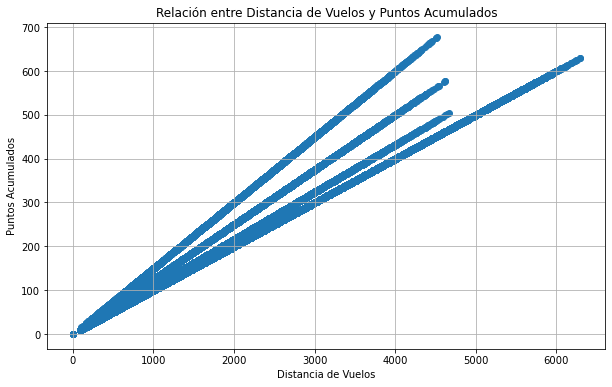

In [39]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_loyalty['distance'], df_loyalty['points_accumulated'])
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia de Vuelos')
plt.ylabel('Puntos Acumulados')
plt.grid(True)
plt.show()

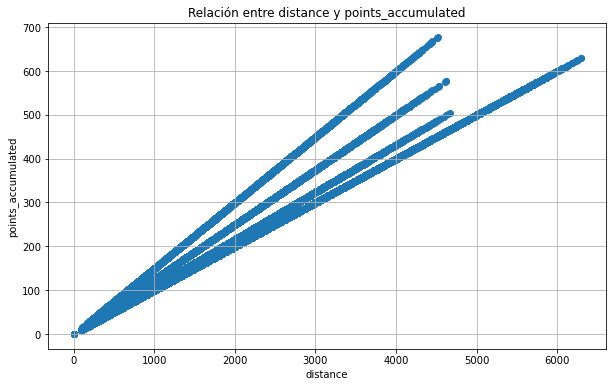

In [40]:
# Pruebo a hacer el grafico llamando a una función 
ADSB.plot_dispersion(df_loyalty, 'distance', 'points_accumulated')

In [41]:
# El gráfico muestra la relación entre la distancia de los vuelos y los puntos acumulados por los clientes. 
# Hay una relación proporcional entre estas dos variables. A mayor distancia más puntos acumulados.

3. ¿Cuál es la distribución de los clientes, por provincia o estado?

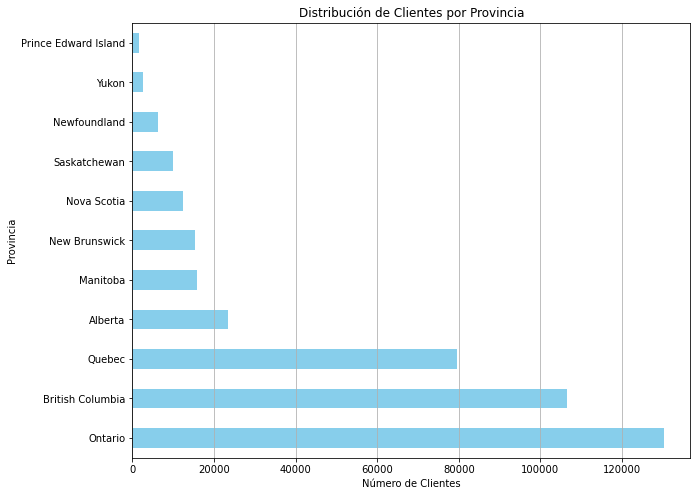

In [42]:
# Contar el número de clientes por provincia
clientes_por_provincia = df_loyalty['province'].value_counts()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
clientes_por_provincia.plot(kind='barh', color='skyblue')
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Número de Clientes')
plt.ylabel('Provincia')
plt.grid(axis='x')

In [43]:
# El gráfico resultante te mostrará la distribución de los clientes por provincia, lo que te permitirá identificar las provincias 
# con más y menos clientes. Se puede observar más número de clientes en las ciudades/provincias más pobladas.
# También se podría hacer un gráfico de barras verticales o un gráfico circular.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

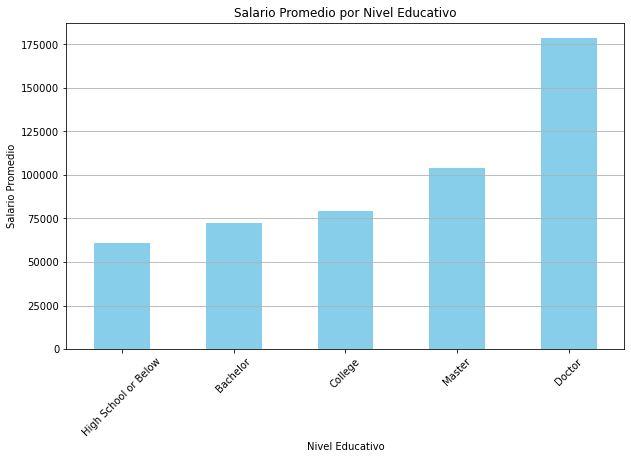

In [44]:
# Calcular el salario promedio por nivel educativo
salario_promedio_por_educacion = df_loyalty.groupby('education')['salary'].mean().sort_values()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
salario_promedio_por_educacion.plot(kind='bar', color='skyblue')
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [45]:
# El gráfico muestra cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes, 
# permite identificar cualquier disparidad salarial entre los grupos educativos. 
# Se puede observar una relación proporcional entre las variables, a mayor nivel educativo mayor salario promedio.
# También podría verse en un gráfico de puntos o un gráfico de cajas.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

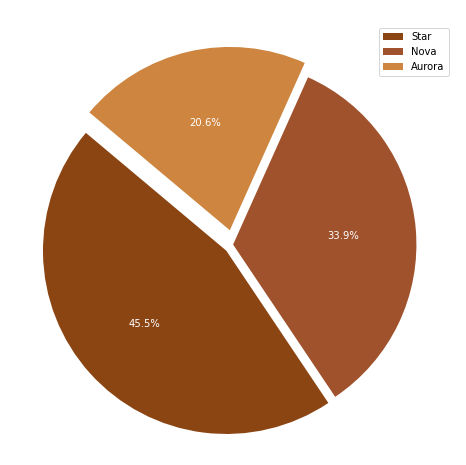

In [60]:
# Contar el número de clientes por tipo de tarjeta de fidelidad
clientes_por_tarjeta = df_loyalty['loyalty_card'].value_counts()

colors = ['#8B4513', '#A0522D', '#CD853F'] # para establecer los colores

explode = ( 0.05 ,0, 0.08) # para sacar los quesitos hacia fuera

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(clientes_por_tarjeta, labels=clientes_por_tarjeta.index, autopct='%1.1f%%', startangle=140, 
        colors=colors, explode =explode, textprops={'color': 'white'})
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad', color = "white")
plt.axis('equal')  # Aspecto igual para asegurar que el pastel se dibuje como un círculo
plt.legend(loc='upper right')  # Añadir leyenda
#plt.tight_layout()  # Ajustar diseño para evitar superposiciones
plt.show()

In [47]:
# El gráfico muestra la proporción de clientes con diferentes tipos de tarjetas de fidelidad, 
# permite identificar cuál tipo de tarjeta es más común entre tus clientes, en este caso la Star.
# También se puede ver en un gráfico de barras.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

<Figure size 720x432 with 0 Axes>

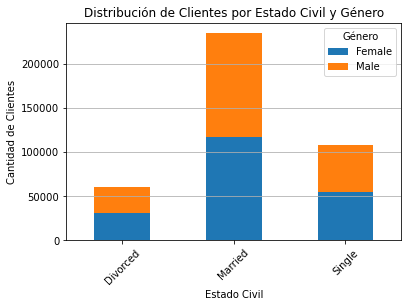

In [48]:
# Crear un DataFrame que contenga la cantidad de clientes por estado civil y género
clientes_por_estado_civil_genero = df_loyalty.groupby(['marital_status', 'gender']).size().unstack()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
clientes_por_estado_civil_genero.plot(kind='bar', stacked=True)
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(axis='y')
plt.show()

In [49]:
# El gráfico muestra la distribución de los clientes según su estado civil y género, lo que permite comparar la proporción   
# de clientes en cada categoría; se observa la tendencia de que hay mas clientes casados.

Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Preparación de Datos:

Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [50]:
# Seleccionar únicamente las columnas relevantes
df_relation= df_loyalty[['flights_booked', 'education']]

In [51]:
df_relation

,flights_booked,education
0,0,Bachelor
1,3,Bachelor
2,0,Bachelor
3,0,Bachelor
4,6,Bachelor
...,...,...
403755,0,Bachelor
403756,0,Bachelor
403757,0,Bachelor
403758,0,Bachelor


Análisis Descriptivo:

Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [52]:
# Agrupar los datos por nivel educativo
df_educativo = df_relation.groupby('education')

# Calcular estadísticas descriptivas básicas para el número de vuelos reservados por grupo educativo
df_descriptivas = df_educativo['flights_booked'].describe().reset_index()

df_descriptivas

,education,count,mean,std,min,25%,50%,75%,max
0,Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
1,College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
2,Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
3,High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
4,Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


In [53]:
# Agrupar los datos por nivel educativo
df_educativo = df_relation.groupby('education')

# Calcular estadísticas descriptivas básicas para el número de vuelos reservados por grupo educativo
df_descriptivas = df_educativo['flights_booked'].describe().T

df_descriptivas

education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


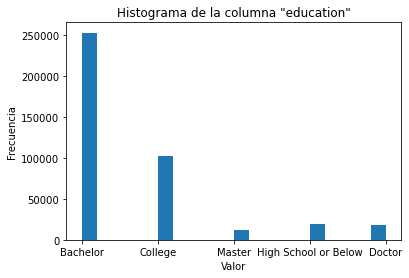

In [54]:
ADSB.plot_histogram(df_loyalty, 'education')

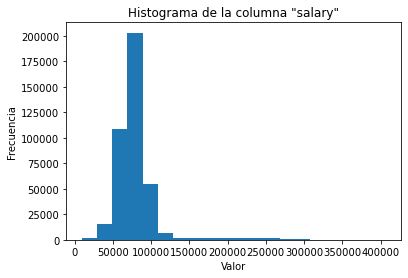

In [55]:
ADSB.plot_histogram(df_loyalty, 'salary')

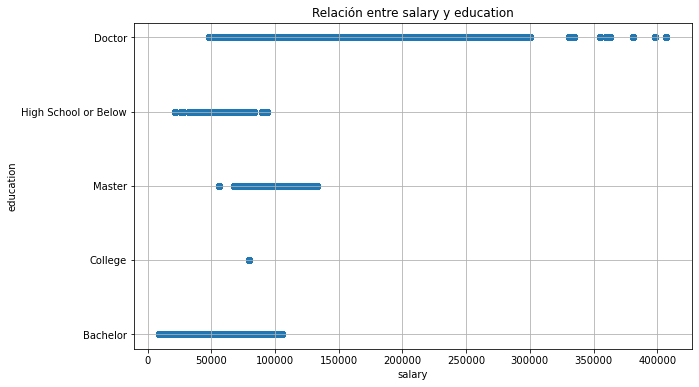

In [56]:
ADSB.plot_dispersion(df_loyalty, 'salary', 'education')

Prueba Estadística:

Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Planteamiento de las hipótesis:  
- Hipótesis nula (H0): No hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.
- Hipótesis alternativa (H1): Hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

- Si el valor p (p-value) es menor que 0.05, rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en la cantidad promedio de anuncios vistos por usuario entre los grupos.

- Si el valor p es mayor que 0.05, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

In [57]:
# Seleccionar dos grupos específicos de nivel educativo
grupo_1 = 'Bachelor'
grupo_2 = 'Master'

# Obtener los datos de vuelos reservados para cada grupo
grupo_1_vuelos = df_loyalty[df_loyalty['education'] == grupo_1]['flights_booked']
grupo_2_vuelos = df_loyalty[df_loyalty['education'] == grupo_2]['flights_booked']

# Realizar la prueba t de Student independiente
resultado_ttest = ttest_ind(grupo_1_vuelos, grupo_2_vuelos)

# Imprimir el resultado
print("Resultado del test t de Student:")
print("Valor de p:", resultado_ttest.pvalue)

if resultado_ttest.pvalue < 0.05:
    print("Hay una diferencia significativa en el número de vuelos reservados entre los grupos", grupo_1, "y", grupo_2)
else:
    print("No hay una diferencia significativa en el número de vuelos reservados entre los grupos", grupo_1, "y", grupo_2)

Resultado del test t de Student:
Valor de p: 0.06088011736048682
No hay una diferencia significativa en el número de vuelos reservados entre los grupos Bachelor y Master


In [58]:
# Selecciono dos grupos incluyendo todos los niveles educativos

# Y verifico que haya Normalidad en la muestra con Shapiro


# Crear los grupos de datos
grupo_1 = df_loyalty[df_loyalty['education'].isin(['Bachelor', 'College', 'High School or Below'])]['flights_booked']
grupo_2 = df_loyalty[df_loyalty['education'].isin(['Master', 'Doctor'])]['flights_booked']

# Realizar la prueba de Shapiro-Wilk para el grupo 1
stat_shapiro_grupo1, p_valor_grupo1 = shapiro(grupo_1)

# Realizar la prueba de Shapiro-Wilk para el grupo 2
stat_shapiro_grupo2, p_valor_grupo2 = shapiro(grupo_2)

# Imprimir los resultados
print("Grupo 1 (Educación Básica)")
print("Estadística de prueba Shapiro-Wilk:", stat_shapiro_grupo1)
print("Valor p:", p_valor_grupo1)
if p_valor_grupo1 > 0.05:
    print("Los datos se distribuyen normalmente (no se puede rechazar la hipótesis nula)")
else:
    print("Los datos no se distribuyen normalmente (se rechaza la hipótesis nula)")

print("\nGrupo 2 (Educación Superior)")
print("Estadística de prueba Shapiro-Wilk:", stat_shapiro_grupo2)
print("Valor p:", p_valor_grupo2)
if p_valor_grupo2 > 0.05:
    print("Los datos se distribuyen normalmente (no se puede rechazar la hipótesis nula)")
else:
    print("Los datos no se distribuyen normalmente (se rechaza la hipótesis nula)")

Grupo 1 (Educación Básica)
Estadística de prueba Shapiro-Wilk: 0.7887166738510132
Valor p: 0.0
Los datos no se distribuyen normalmente (se rechaza la hipótesis nula)

Grupo 2 (Educación Superior)
Estadística de prueba Shapiro-Wilk: 0.7934401631355286
Valor p: 0.0
Los datos no se distribuyen normalmente (se rechaza la hipótesis nula)


/home/chandy/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [59]:
# Definir los grupos específicos de nivel educativo
grupo_1 = ['Bachelor', 'College', 'High School or Below']
grupo_2 = ['Master', 'Doctor']

# Obtener los datos de vuelos reservados para cada grupo
grupo_1_vuelos = df_loyalty[df_loyalty['education'].isin(grupo_1)]['flights_booked']
grupo_2_vuelos = df_loyalty[df_loyalty['education'].isin(grupo_2)]['flights_booked']

# Realizar la prueba t de Student independiente
resultado_ttest = ttest_ind(grupo_1_vuelos, grupo_2_vuelos)

# Imprimir el resultado
print("Resultado del test t de Student:")
print("Valor de p:", resultado_ttest.pvalue)

# Interpretar el resultado
if resultado_ttest.pvalue < 0.05:
    print("Hay una diferencia significativa en el número de vuelos reservados entre los grupos de Educación Básica y Educación Superior.")
else:
    print("No hay una diferencia significativa en el número de vuelos reservados entre los grupos de Educación Básica y Educación Superior.")

Resultado del test t de Student:
Valor de p: 0.07465149402648143
No hay una diferencia significativa en el número de vuelos reservados entre los grupos de Educación Básica y Educación Superior.
